<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Lab 02 - Introduction To Data Science @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 3.0 - Exploratory data analysis
</div>

## Import

In [1]:
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# YOUR CODE HERE (OPTION) 
# If you need other libraries, you can import them here
import seaborn as sns
import re

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.data_module import read_processed_df

In [2]:
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 100)

# Load dataframes that need to be used

In [3]:
channels_df = read_processed_df.read_channel_df()
channels_df

,channel_name,playlist_count,video_count,subscriber_count,view_count,like_count,comment_count,join_date,country,description,link
0,DeepLearningAI,17,364,271000,16853716,193994.0,6398.0,2017-08-22 22:27:58+00:00,Not available,Welcome to the official DeepLearning.AI YouTube channel! Here you can find the videos from our C...,https://www.youtube.com/channel/UCcIXc5mJsHVYTZR1maL5l9w
1,3Blue1Brown,20,177,5750000,458811087,12643439.0,448521.0,2015-03-03 23:11:55+00:00,United States,"My name is Grant Sanderson. Videos here cover a variety of topics in math, or adjacent fields li...",https://www.youtube.com/channel/UCYO_jab_esuFRV4b17AJtAw
2,Joma Tech,10,108,2270000,187590804,6679177.0,218210.0,2016-08-31 22:22:07+00:00,United States,I talk about life in Silicon Valley and at big tech companies.\n\nFollow me on:\nInstagram: http...,https://www.youtube.com/channel/UCV0qA-eDDICsRR9rPcnG7tw
3,DataCamp,25,851,155000,17927443,55430.0,1913.0,2014-03-25 14:48:01+00:00,United States,"Welcome to DataCamp's official YouTube channel, your premier resource for data science and AI le...",https://www.youtube.com/channel/UC79Gv3mYp6zKiSwYemEik9A
4,CS Dojo,9,105,1920000,80114014,1997796.0,87334.0,2016-02-26 01:49:30+00:00,Canada,"Hello! My name is YK, and I usually make videos about programming and computer science here :)\n...",https://www.youtube.com/channel/UCxX9wt5FWQUAAz4UrysqK9A
5,sentdex,95,1221,1280000,120676584,1362276.0,135903.0,2012-12-16 20:49:11+00:00,United States,"Python Programming tutorials, going further than just the basics. Learn about machine learning, ...",https://www.youtube.com/channel/UCfzlCWGWYyIQ0aLC5w48gBQ
6,StatQuest with Josh Starmer,15,192,1060000,56417057,1235579.0,82326.0,2011-05-24 01:52:48+00:00,United States,"Statistics, Machine Learning and Data Science can sometimes seem like very scary topics, but sin...",https://www.youtube.com/channel/UCtYLUTtgS3k1Fg4y5tAhLbw
7,Tech With Tim,72,784,1400000,119884321,3153040.0,125261.0,2014-04-23 01:57:10+00:00,Canada,"Learn programming, software engineering, machine learning and everything tech from this channel....",https://www.youtube.com/channel/UC4JX40jDee_tINbkjycV4Sg
8,365 Data Science,18,224,304000,13603729,271195.0,7785.0,2017-08-07 15:17:05+00:00,Bulgaria,At 365 Data Science we make #DataScience accessible to all by providing the highest quality onli...,https://www.youtube.com/channel/UCEBpSZhI1X8WaP-kY_2LLcg
9,Data Professor,30,385,172000,17006302,529963.0,26732.0,2019-08-17 15:59:56+00:00,Thailand,"Data Science, Machine Learning, Bioinformatics, Research and Teaching are my passion. The Data P...",https://www.youtube.com/channel/UCV8e2g4IWQqK71bbzGDEI4Q


In [4]:
videos_df = read_processed_df.read_video_df()
videos_df.head()

,video_id,title,published,view_count,like_count,comment_count,duration,definition,tags,default_audio_language,madeforkid,playlist_title,channelTitle,playlist_published,playlist_numvideo
0,H_8ZVRRtiIA,"#1 AI for Good Specialization [Course 1, Week 1, Lesson 1]",2023-11-17 21:49:15+00:00,1671,34.0,1.0,0 days 00:10:01,hd,NaN,en,False,AI for Good Specialization by DeepLearning.AI,DeepLearningAI,2023-07-20 17:01:28+00:00,37.0
1,bZwkaVnhEo4,"#2 AI for Good Specialization [Course 1, Week 1, Lesson 1]",2023-07-27 16:54:21+00:00,1299,18.0,1.0,0 days 00:07:12,hd,NaN,en,False,AI for Good Specialization by DeepLearning.AI,DeepLearningAI,2023-07-20 17:01:28+00:00,37.0
2,hkOosfWxBK4,"#3 AI for Good Specialization [Course 1, Week 1, Lesson 1]",2023-11-17 20:13:19+00:00,584,20.0,2.0,0 days 00:03:47,hd,NaN,en,False,AI for Good Specialization by DeepLearning.AI,DeepLearningAI,2023-07-20 17:01:28+00:00,37.0
3,OIavgUGg7mc,"#4 AI for Good Specialization [Course 1, Week 1, Lesson 1]",2023-07-27 16:54:56+00:00,619,10.0,0.0,0 days 00:04:49,hd,NaN,en,False,AI for Good Specialization by DeepLearning.AI,DeepLearningAI,2023-07-20 17:01:28+00:00,37.0
4,eZZwySXsj-g,"#5 AI for Good Specialization [Course 1, Week 1, Lesson 2]",2023-07-27 16:55:12+00:00,579,3.0,0.0,0 days 00:05:36,hd,NaN,en,False,AI for Good Specialization by DeepLearning.AI,DeepLearningAI,2023-07-20 17:01:28+00:00,37.0


In [5]:
comments_df = read_processed_df.read_comment_df()
comments_df.head()

,author,Type,video_id,total_reply,like_count,published_at,textdisplay,updatedat
0,@AiexpertRajivVerma,1.0,H_8ZVRRtiIA,0.0,0.0,2023-12-11 01:11:19+00:00,Sir thank you love love 💕❤️❤❤️❤❤❤❤❤❤ you for free these courses as I belong from India but don&#...,2023-12-11 01:11:19+00:00
1,@hamasali8764,1.0,bZwkaVnhEo4,0.0,0.0,2023-07-27 16:54:52+00:00,Best One🎉,2023-07-27 16:54:52+00:00
2,@R0H00,1.0,hkOosfWxBK4,0.0,1.0,2023-11-18 02:51:01+00:00,"Hi, I&#39;m a clinician who is working in the digital health/ informatics space. Can you please ...",2023-11-18 02:51:01+00:00
3,@nitinsnoisepollution6293,1.0,hkOosfWxBK4,0.0,0.0,2023-11-17 20:39:13+00:00,Superb 🎉❤,2023-11-17 20:39:13+00:00
4,@REDBONDYT,1.0,Fxq6vjJwX3o,0.0,1.0,2023-07-30 12:36:13+00:00,Very informative 😃😺,2023-07-30 12:36:13+00:00


# Overview about all channels

## Introduction to the channels being analyzed

In our project, we will analyze 18 channels, all of which have been selected by our team members, primarily based on their personal preferences.

We have chosen numerous popular channels with a long history and a familiar presence in broadcasting. Additionally, we have selected some new channels with promising content poised for future development

In [ ]:
def convert_to_KMB_format(number):
    if number >= 1000000000:
        return str(round(number/1000000000, 1)) + 'B'
    elif number >= 1000000:
        return str(round(number/1000000, 1)) + 'M'
    elif number >= 1000:
        return str(round(number/1000, 1)) + 'K'
    else:
        return str(number)

In [ ]:
def preprocess_description(description):
    # Remove special characters and extra whitespaces
    description = re.sub(r'[^\w\s]', '', description)
    description = re.sub(r'\s+', ' ', description)
    return description.strip()

temp_df = channels_df[['channel_name', 'join_date', 'subscriber_count', 'description']].sort_values(by='join_date', ascending=True)
temp_df['join_date'] = temp_df['join_date'].dt.date
# Sort the dataframe by the join date
temp_df = temp_df.sort_values(by='join_date', ascending=True).reset_index(drop=True)
# Display full description
# Replace the subscriber count with the K/M/B format
temp_df['subscriber_count'] = temp_df['subscriber_count'].apply(convert_to_KMB_format)

for i in range(len(temp_df)):
    print(f"Channel Name: {temp_df['channel_name'][i]}  \n\tJoin Date:        {temp_df['join_date'][i]}  \n\tSubscriber Count: {temp_df['subscriber_count'][i]}  \n\tDescription:      {preprocess_description(temp_df['description'][i])}\n")

Channel Name: Two Minute Papers  
	Join Date:        2006-08-18  
	Subscriber Count: 1.5M  
	Description:      What a time to be alive

Channel Name: IBM Technology  
	Join Date:        2008-05-27  
	Subscriber Count: 614.0K  
	Description:      Whether its AI automation cybersecurity data science DevOps quantum computing or anything in between we provide educational content on the biggest topics in tech Subscribe to build your skillset learn about new trends and gain insights from IBM experts This channel follows the IBM Social Computing Guidelines

Channel Name: Abhishek Thakur  
	Join Date:        2009-05-24  
	Subscriber Count: 108.0K  
	Description:      I make videos about applied machine learning deep learning and data science I am the worlds first Quadruple Grand Master on Kaggle My codeintensive book Approaching Almost Any Machine Learning Problem can be downloaded for free from httpsbitlyapproachingml If you like it you can also buy paperback copies Feel free to contact me fo

## Does the number of subscribers determine the popularity of a channel?

We will create four bar charts representing the number of subscribers, views, likes, and comments, arranged in descending order of the number of subscribers.

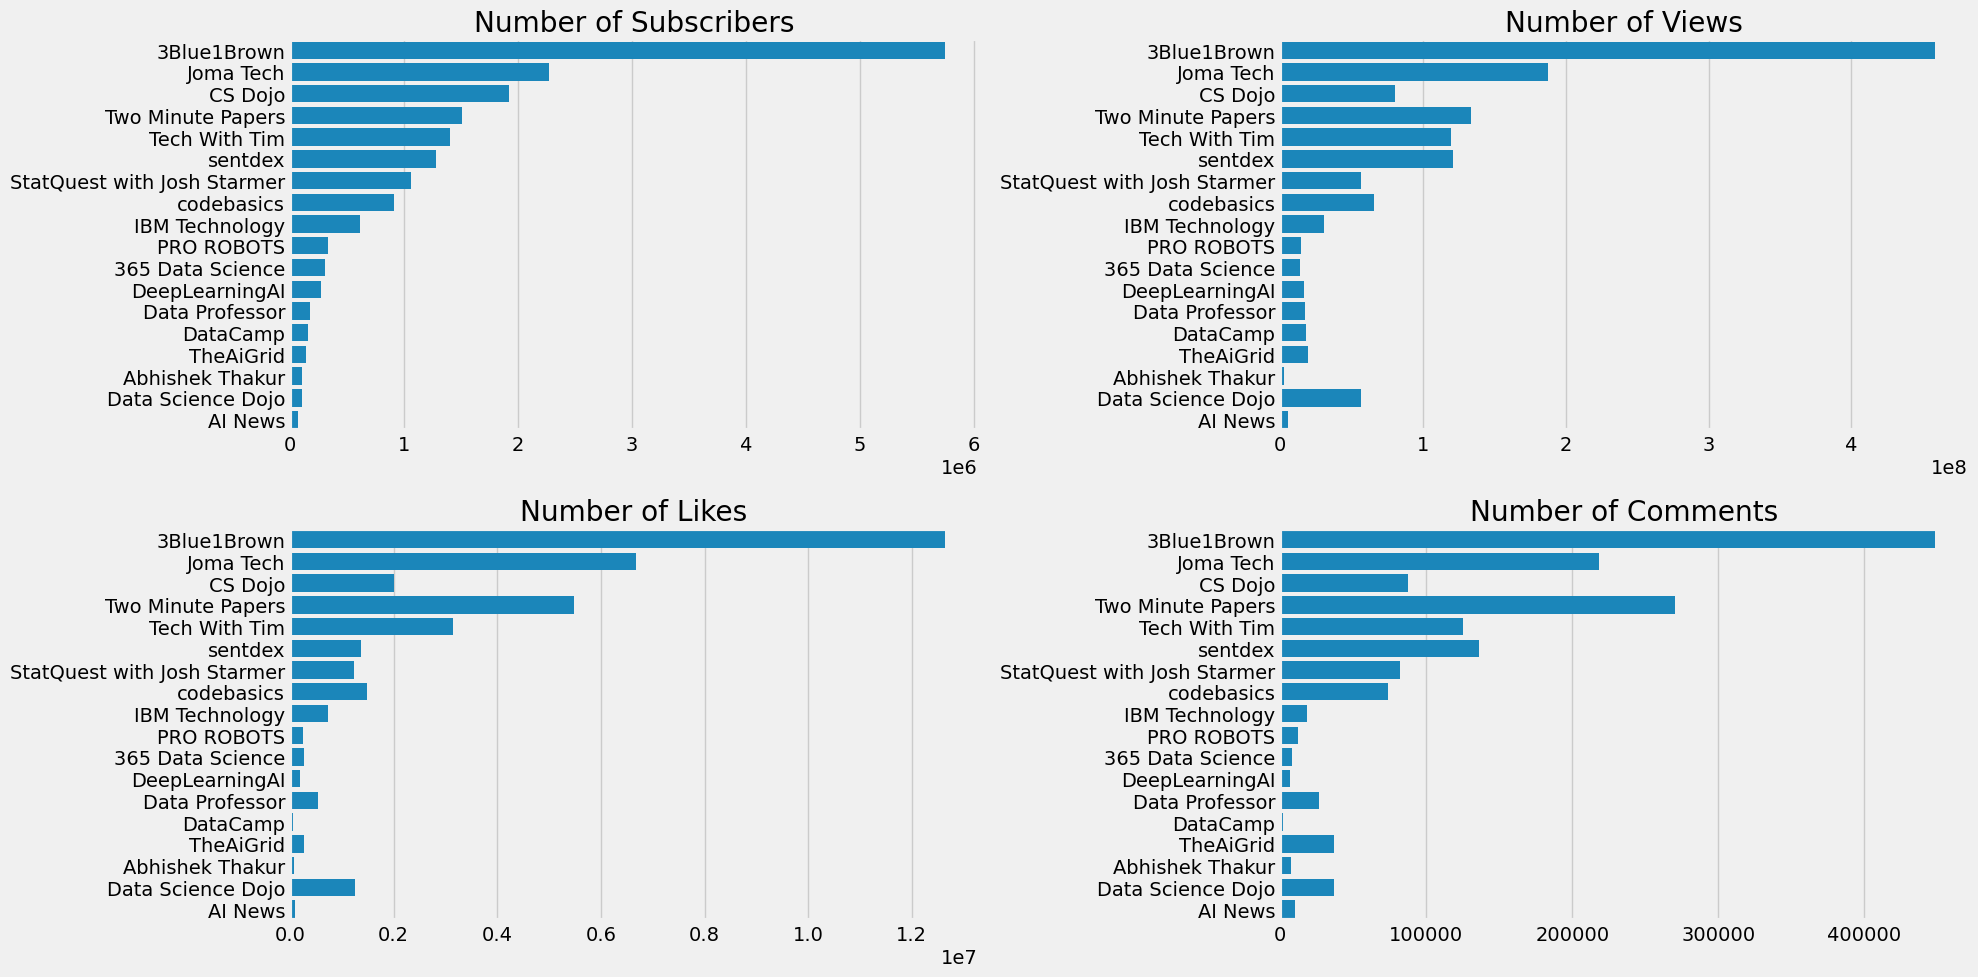

In [ ]:
temp_df = channels_df.sort_values(by=['subscriber_count'], ascending=False)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
axes = axes.flatten()
# Plot number of subscribers
sns.barplot(x='subscriber_count', y='channel_name', data=temp_df, ax=axes[0])
axes[0].set_title('Number of Subscribers')

# Plot number of views
sns.barplot(x='view_count', y='channel_name', data=temp_df, ax=axes[1])
axes[1].set_title('Number of Views')

# Plot number of likes
sns.barplot(x='like_count', y='channel_name', data=temp_df, ax=axes[2])
axes[2].set_title('Number of Likes')

# Plot number of comments
sns.barplot(x='comment_count', y='channel_name', data=temp_df, ax=axes[3])
axes[3].set_title('Number of Comments')

# Remove labels
axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[2].set_ylabel('')
axes[3].set_ylabel('')
axes[0].set_xlabel('')
axes[1].set_xlabel('')
axes[2].set_xlabel('')
axes[3].set_xlabel('')

plt.tight_layout()
plt.show()

Obviously, the number of subscribers isn't the only factor that determines the popularity of a channel. Typically `CS Dojo` has so many subscribers but it doesn't perform well in other metrics. On the other side, `Data Science Dojo` doesn't have many subscribers but its views, likes, even comments are quite high.

## How are these channels viewed?

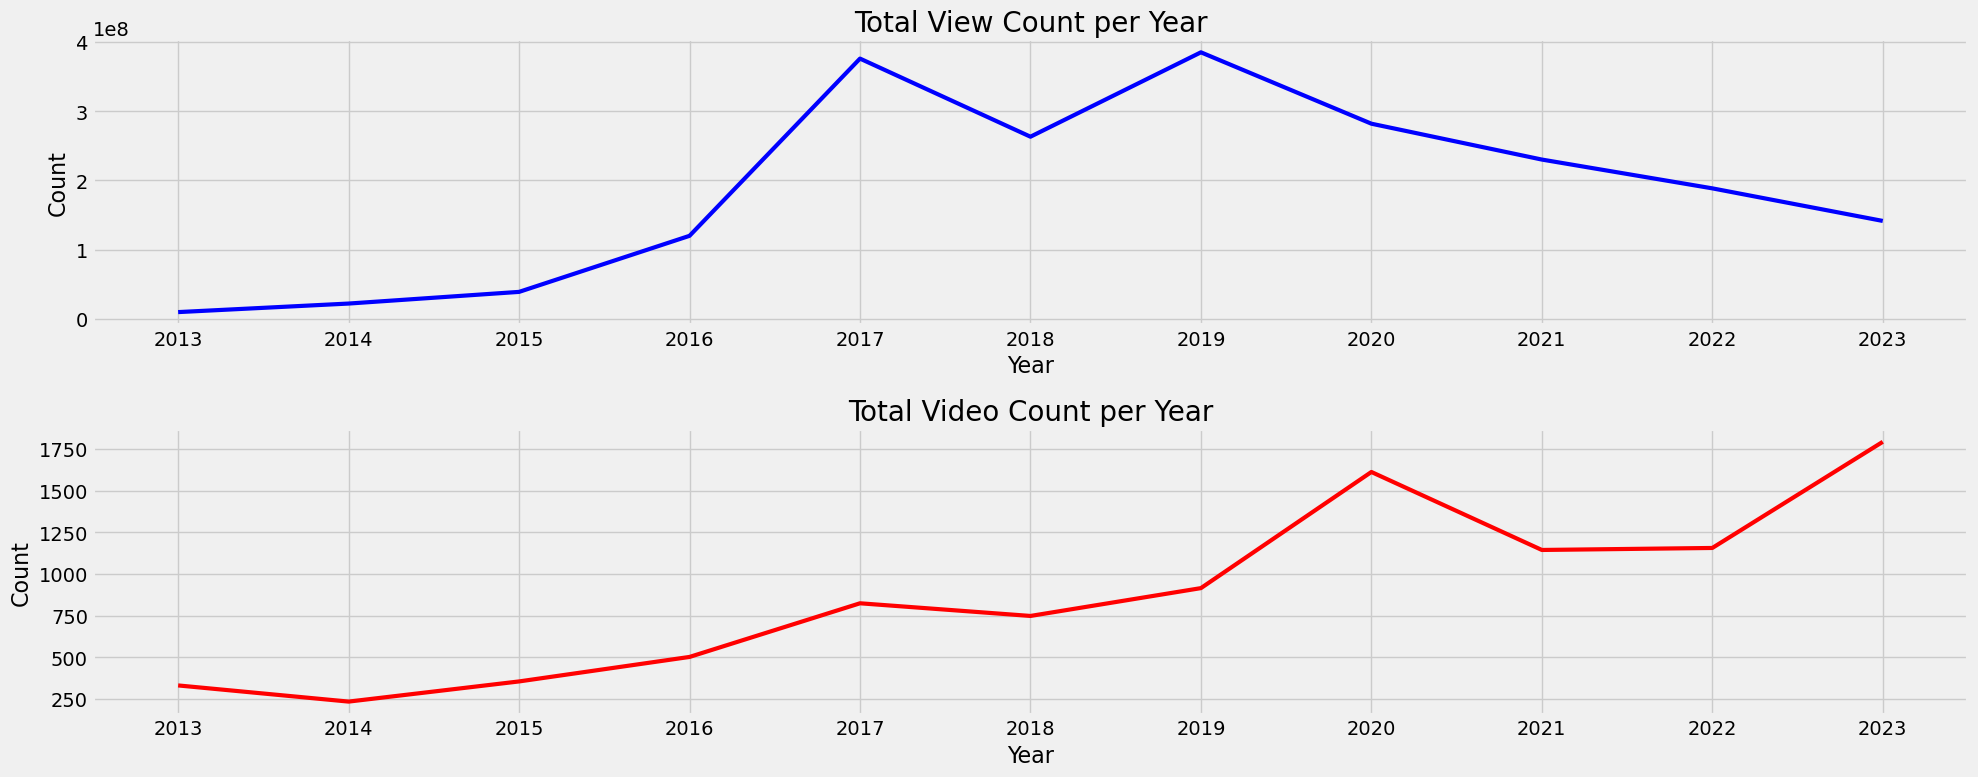

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8))

# Plot for view count per year
temp_df = videos_df.groupby([videos_df['published'].dt.year])['view_count'].sum()
ax1.plot(temp_df.index, temp_df.values, linewidth=3, color='blue')
ax1.set_title('Total View Count per Year', fontsize=20)
ax1.set_xlabel('Year', fontsize=16)
ax1.set_ylabel('Count', fontsize=16)
ax1.set_xticks(temp_df.index)
ax1.grid(True)

# Plot for video count per year
temp_df = videos_df.groupby([videos_df['published'].dt.year])['video_id'].count()
ax2.plot(temp_df.index, temp_df.values, linewidth=3, color='red')
ax2.set_title('Total Video Count per Year', fontsize=20)
ax2.set_xlabel('Year', fontsize=16)
ax2.set_ylabel('Count', fontsize=16)
ax2.set_xticks(temp_df.index)
ax2.grid(True)

plt.tight_layout()
plt.show()

While creators continue to produce more videos, the number of views has recently shown a decreasing trend, reaching its peak only in 2017 and 2019, despite the fact that these two years do not have a lot of videos. In contrast, 2020 and 2023 have seen an increase in the number of videos, but the number of views is decreasing compared to previous years.

In [ ]:
# Line plot of the number of view per years of each channel
temp_df = videos_df.groupby(['channelTitle', videos_df['published'].dt.year])[
    'view_count'].sum().unstack()
# Short add the year join to sort then remove it
temp_df = temp_df.join(channels_df.set_index('channel_name')[
                       'join_date'].dt.year).sort_values(by='join_date').drop('join_date', axis=1)

# Replace the view counts with the K/M/B format
temp_df = temp_df.apply(lambda x: x.apply(
    lambda 
        y: f'{y/1e9:.1f}B' if y >= 1e9 
                            else f'{y/1e6:.1f}M' 
                                if y >= 1e6 
                                else  f'{y/1e3:.1f}K' if y > 0 else 0))

temp_df

,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
channelTitle,,,,,,,,,,,
Two Minute Papers,0,0,3.9M,4.7M,9.4M,13.3M,67.8M,57.4M,53.9M,58.4M,40.3M
IBM Technology,0,0,48.5K,0,251.4K,3.1M,12.0M,11.4M,7.5M,4.8M,5.6M
Abhishek Thakur,0,0,0,0,0,0,103.4K,1.5M,742.8K,142.2K,446.3K
StatQuest with Josh Starmer,0,0,2.8M,1.5M,31.8M,45.4M,23.1M,15.3M,5.5M,2.4M,1.9M
sentdex,9.9M,22.3M,18.1M,21.9M,26.2M,8.9M,7.7M,3.8M,2.3M,3.4M,1.0M
Tech With Tim,0,0,0,0,3.4M,7.5M,46.3M,30.0M,20.2M,7.8M,7.9M
Data Science Dojo,0,3.3K,0,157.8K,35.4M,8.3M,5.5M,11.1M,6.0M,4.8M,922.5K
DataCamp,0,0,3.0M,3.4M,20.2K,79.1K,1.3M,2.9M,7.3M,127.0K,115.1K
3Blue1Brown,0,0,11.3M,79.2M,193.6M,86.1M,171.0M,46.1M,17.7M,60.1M,42.5M


Now, let's take a closer look at each channel. For most channels, the peak of views occurs within two years, after a few years of activity, and then the views start to decrease. However, exceptions exist for channels like `Two Minute Papers` and `3Blue1Brown` as their exceptionally interesting content allows them to maintain views for a longer duration.

In contrast, newer channels such as `PRO ROBOTS`, `AI News`, and `TheAiGrid` have achieved a substantial number of views in 2023 despite being recently established. This indicates promising content for the future.

Notably, the channel `CS Dojo` recorded zero views in 2023, suggesting a potential halt in video production. Nevertheless, the older videos from this channel still hold significant value for viewers.

## What is the most interesting channel?

In this section, we will not evaluate based on the number of likes or comments. This is due to the obvious fact that more popular channels will naturally have more likes and comments. In my opinion, popularity doesn't necessarily equate to interest. Instead, we will assess using the ratio of likes and comments to views.

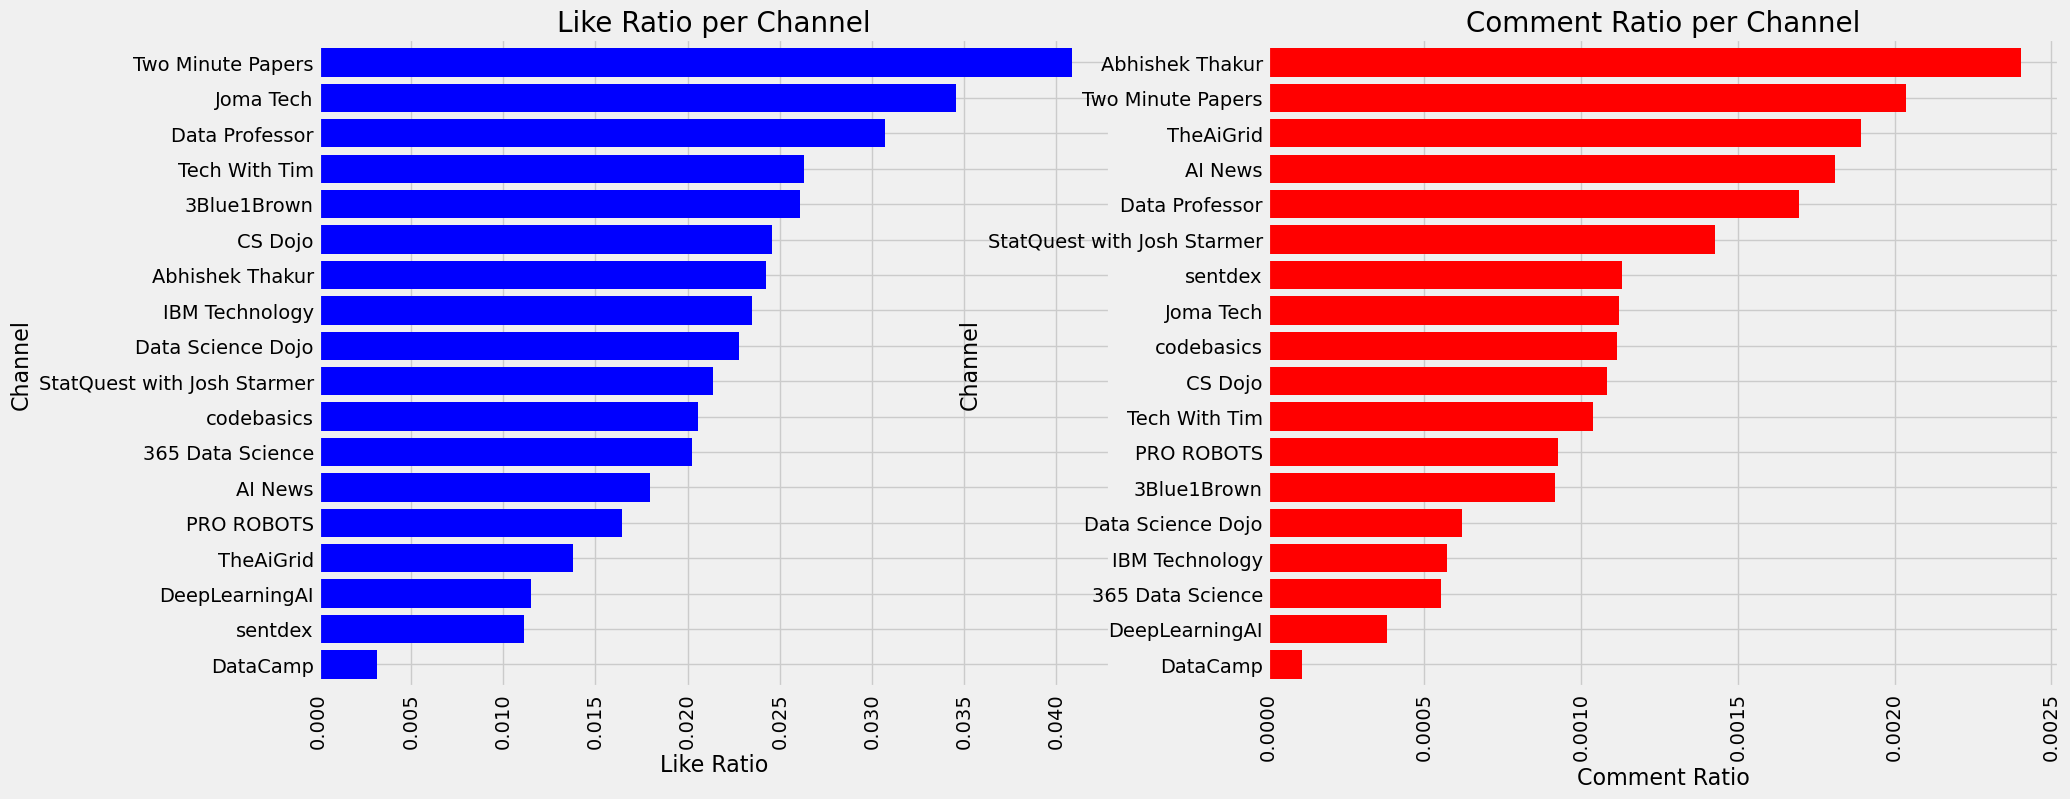

In [ ]:
temp_df = videos_df.groupby(['channelTitle'])[['view_count', 'like_count', 'comment_count']].sum()
temp_df['like_ratio'] = temp_df['like_count'] / temp_df['view_count']
temp_df['comment_ratio'] = temp_df['comment_count'] / temp_df['view_count']

# Plot the like ratio and comment ratio
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
temp_df.sort_values(by='like_ratio')['like_ratio'].plot(
    kind='barh', ax=ax1, color='blue', width=0.8)
ax1.set_title('Like Ratio per Channel', fontsize=20)
ax1.set_ylabel('Channel', fontsize=16)
ax1.set_xlabel('Like Ratio', fontsize=16)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

temp_df.sort_values(by='comment_ratio')['comment_ratio'].plot(
    kind='barh', ax=ax2, color='red', width=0.8)
ax2.set_title('Comment Ratio per Channel', fontsize=20)
ax2.set_ylabel('Channel', fontsize=16)
ax2.set_xlabel('Comment Ratio', fontsize=16)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
plt.show()

As we expected, `Two Minute Papers` has very high ratios of likes and comments to views. This channel showcase and attempt to explain interesting research works. With only couple minutes of each video, viewers can quickly grasp the main idea of some new reseach works. This makes each video has a high ratio of interaction and follow channel in a long time.

`Abhishek Thakur`, `TheAiGrid`, `AI News`, `Data Professor` all are new channels but they still stand in the top. This is a good sign for the future of these channels with promising content.

`Joma Tech`, `Tech With Tim`, `3Blue1Brown`, `StatQuest with Josh Starmer`, and `CS Dojo` are prominent channels, each with its own standing and widespread familiarity among viewers in the field of technology.

Surprisingly, `Abhishek Thakur` has an exceptionally high ratio of likes and comments to views, particularly in the comments section. The channel is named after its creator, who holds the prestigious title of the world's first Quadruple Grand Master on Kaggle. His videos primarily focus on coding interesting projects, models, and utilizing new libraries, making them engaging topics for discussion and commentary.

# Overview about all videos

### The timeframe for video publishing

In [ ]:
videos_df = read_processed_df.read_video_df()
videos_df.head()

,video_id,title,published,view_count,like_count,comment_count,duration,definition,tags,default_audio_language,madeforkid,playlist_title,channelTitle,playlist_published,playlist_numvideo
0,H_8ZVRRtiIA,"#1 AI for Good Specialization [Course 1, Week 1, Lesson 1]",2023-11-17 21:49:15+00:00,1671,34.0,1.0,0 days 00:10:01,hd,NaN,en,False,AI for Good Specialization by DeepLearning.AI,DeepLearningAI,2023-07-20 17:01:28+00:00,37.0
1,bZwkaVnhEo4,"#2 AI for Good Specialization [Course 1, Week 1, Lesson 1]",2023-07-27 16:54:21+00:00,1299,18.0,1.0,0 days 00:07:12,hd,NaN,en,False,AI for Good Specialization by DeepLearning.AI,DeepLearningAI,2023-07-20 17:01:28+00:00,37.0
2,hkOosfWxBK4,"#3 AI for Good Specialization [Course 1, Week 1, Lesson 1]",2023-11-17 20:13:19+00:00,584,20.0,2.0,0 days 00:03:47,hd,NaN,en,False,AI for Good Specialization by DeepLearning.AI,DeepLearningAI,2023-07-20 17:01:28+00:00,37.0
3,OIavgUGg7mc,"#4 AI for Good Specialization [Course 1, Week 1, Lesson 1]",2023-07-27 16:54:56+00:00,619,10.0,0.0,0 days 00:04:49,hd,NaN,en,False,AI for Good Specialization by DeepLearning.AI,DeepLearningAI,2023-07-20 17:01:28+00:00,37.0
4,eZZwySXsj-g,"#5 AI for Good Specialization [Course 1, Week 1, Lesson 2]",2023-07-27 16:55:12+00:00,579,3.0,0.0,0 days 00:05:36,hd,NaN,en,False,AI for Good Specialization by DeepLearning.AI,DeepLearningAI,2023-07-20 17:01:28+00:00,37.0


In [ ]:
start = videos_df['published'].min().date()
end = videos_df['published'].max().date()
print(f"Videos published between {start} and {end}")

Videos published between 2013-05-10 and 2023-12-30


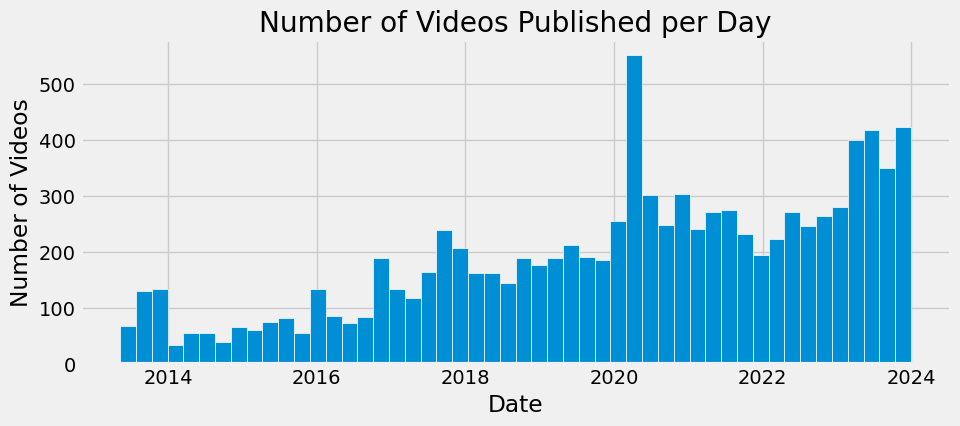

In [ ]:
# Histogram of the number of videos published
plt.figure(figsize=(10, 4))
plt.hist(videos_df['published'], bins=50, edgecolor='white')
plt.title('Number of Videos Published per Day')
plt.xlabel('Date')
plt.ylabel('Number of Videos')
plt.show()

There are three main timeframes for video publishing:

- Mid 2017 to 2018.
- 2020-2022: This period coincided with the COVID-19 pandemic.
- 2023-now: This is due to the fact that most of the collected channels are relatively new, having been created recently.

### The common time for video publishing

#### By month

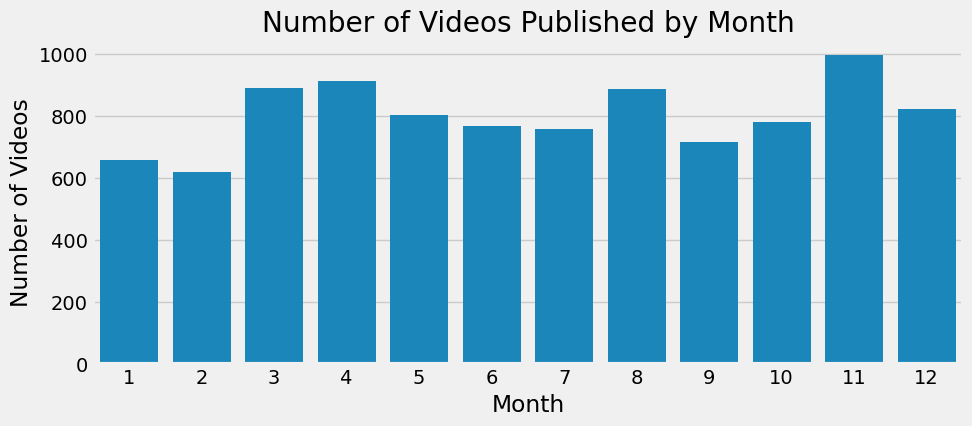

In [ ]:
# Number of videos published by month
videos_df['month'] = videos_df['published'].dt.month

plt.figure(figsize=(10, 4))
sns.countplot(x='month', data=videos_df)
plt.title('Number of Videos Published by Month')
plt.xlabel('Month')
plt.ylabel('Number of Videos')
plt.show()

Creators tend to publish videos on May, August, and November. 

#### By day of week

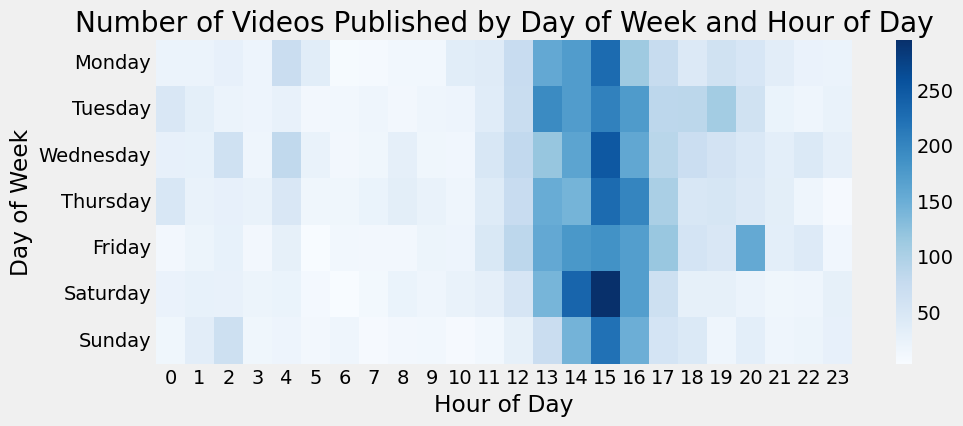

In [ ]:
# Heatmap of the number of videos published by day of week and hour of day
videos_df['day_of_week'] = videos_df['published'].dt.strftime('%A')
videos_df['hour_of_day'] = videos_df['published'].dt.hour

# Sort the days of the week
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
videos_df['day_of_week'] = pd.Categorical(videos_df['day_of_week'], categories=days_of_week, ordered=True)

plt.figure(figsize=(10, 4))
sns.heatmap(videos_df.groupby(['day_of_week', 'hour_of_day']).size().unstack(), cmap='Blues')
plt.title('Number of Videos Published by Day of Week and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')

plt.show()

Tuesday, Wednesday, and Thursday are the most common days for video publishing. This may be due to the fact that most of the creators create videos on weekends and publish them on weekdays.

The majority of content creators choose to release their videos during the afternoon and evening, with 3 PM emerging as the prevailing time. This preference could stem from creators' belief that audiences are more inclined to engage with videos during these later hours.

### Distribution of video durations

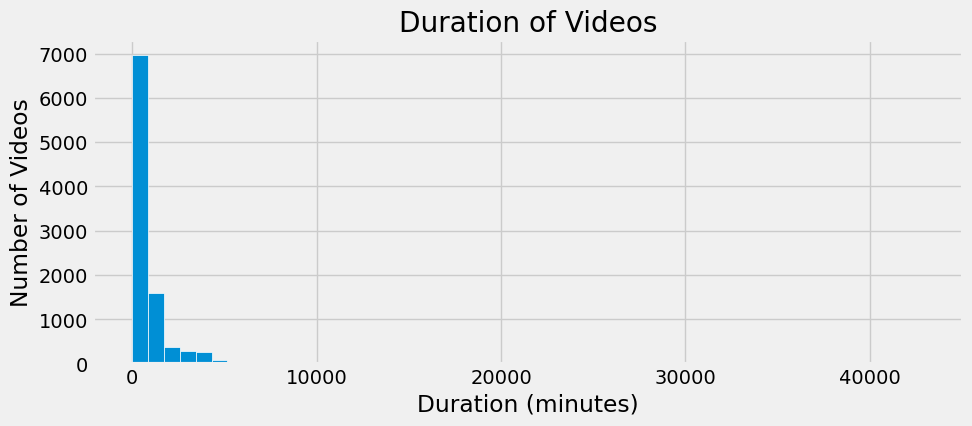

In [ ]:
# Histogram of the duration of videos
plt.figure(figsize=(10, 4))
plt.hist(videos_df['duration'].dt.seconds, bins=50, edgecolor='white')
plt.title('Duration of Videos')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Videos')
plt.show()

# 